In [1]:
import pandas as pd

data = pd.read_csv('../data/processed/processed.csv')

In [2]:
from sklearn.cluster import AgglomerativeClustering, KMeans, SpectralClustering, Birch, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture

methods = {
     'AC': AgglomerativeClustering(),
     'k-Means' : KMeans(), 
     'SC': SpectralClustering(), 
     'Birch': Birch(),
     'DBSCAN': DBSCAN(), 
     'MeanShift': MeanShift(),
}

In [3]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

scores = []
iterations_per_method = 100

for index, method in enumerate(methods.values()):
    for iteration in range(iterations_per_method): 
        prediction = method.fit_predict(X=data)
        sc = silhouette_score(data, prediction)
        db = davies_bouldin_score(data, prediction)
        ch = calinski_harabasz_score(data, prediction)
        scores.append((index, iteration, sc, db, ch))

In [4]:
import numpy as np

methods_ids, iteration_numbers,silhouette_scores_all, davies_bouldin_scores_all, calinski_harabasz_scores_all  = zip(*scores)

silhouette_scores_by_method = [[]for i in range(len(methods))]
davies_bouldin_scores_by_method = [[]for i in range(len(methods))]
calinski_harabasz_scores_by_method = [[]for i in range(len(methods))]

for i, method_id in enumerate(methods_ids):
    silhouette_scores_by_method[method_id].append(silhouette_scores_all[i])
    davies_bouldin_scores_by_method[method_id].append(davies_bouldin_scores_all[i])
    calinski_harabasz_scores_by_method[method_id].append(calinski_harabasz_scores_all[i])

In [5]:
silhouette_score_avg_per_method = [sum(score_list)/len(score_list) for score_list in silhouette_scores_by_method]
davies_bouldin_score_avg_per_method = [sum(score_list)/len(score_list) for score_list in davies_bouldin_scores_by_method]
calinski_harabasz_score_avg_per_method = [sum(score_list)/len(score_list) for score_list in calinski_harabasz_scores_by_method]

silhouette_score_std_per_method = [np.std(score_list) for score_list in silhouette_scores_by_method]
davies_bouldin_score_std_per_method = [np.std(score_list) for score_list in davies_bouldin_scores_by_method]
calinski_harabasz_score_std_per_method = [np.std(score_list) for score_list in calinski_harabasz_scores_by_method]



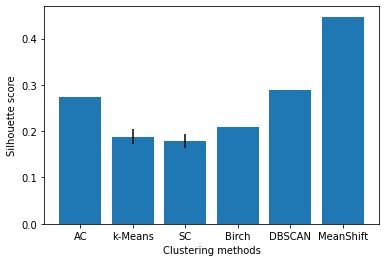

In [60]:
import matplotlib.pyplot as plt

method_indexes = [i for i in range(len(methods))]

plt.bar(method_indexes, silhouette_score_avg_per_method, yerr=silhouette_score_std_per_method)
plt.xlabel('Clustering methods')
plt.ylabel('Silhouette score')
plt.xticks(method_indexes, methods.keys())
plt.savefig("../results/evaluation/all_models_default_parameters/silhouette_scores.png")
plt.show()


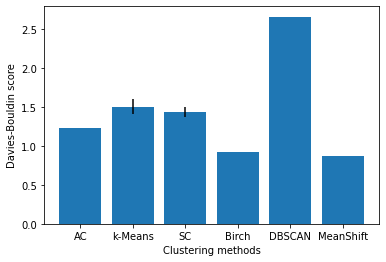

In [59]:
plt.bar(method_indexes, davies_bouldin_score_avg_per_method, yerr=davies_bouldin_score_std_per_method)
plt.xlabel('Clustering methods')
plt.ylabel('Davies-Bouldin score')
plt.xticks(method_indexes, methods.keys())
plt.savefig("../results/evaluation/all_models_default_parameters/davies_bouldin_scores.png")
plt.show()


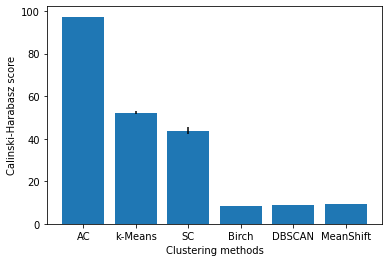

In [58]:
plt.bar(method_indexes, calinski_harabasz_score_avg_per_method, yerr=calinski_harabasz_score_std_per_method)
plt.xlabel('Clustering methods')
plt.ylabel('Calinski-Harabasz score')
plt.xticks(method_indexes, methods.keys())
plt.savefig("../results/evaluation/all_models_default_parameters/calinski_harabasz_scores.png")
plt.show()


In [19]:


sorted_by_max_sc = sorted(method_indexes, key=lambda index: silhouette_score_avg_per_method[index], reverse=True)
sorted_by_min_db = sorted(method_indexes, key=lambda index: davies_bouldin_score_avg_per_method[index], reverse=False)
sorted_by_max_ch = sorted(method_indexes, key=lambda index: calinski_harabasz_score_avg_per_method[index], reverse=True)



In [48]:
def average_placement(method_index):
    # All sorted by arrays are 0-indexed. 3 is added so the placements are 1-indexed.
    return (sorted_by_max_sc.index(method_index) + sorted_by_min_db.index(method_index) + sorted_by_max_ch.index(method_index) + 3) / 3

In [49]:
average_placements = [average_placement(method_index) for method_index in method_indexes]

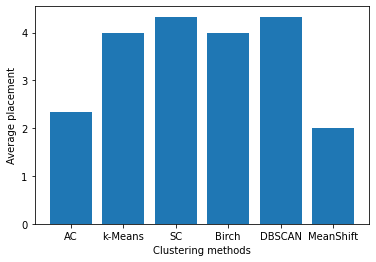

In [57]:
plt.bar(method_indexes, average_placements)
plt.xlabel('Clustering methods')
plt.ylabel('Average placement')
plt.xticks(method_indexes, methods.keys())
plt.savefig("../results/evaluation/all_models_default_parameters/average_placement_.png")
plt.show()

In [51]:
overall_placements = sorted(method_indexes, key=lambda method_index: average_placements[method_index], reverse=False)

for placement, method_index in enumerate(overall_placements):
    print(f'Place {placement + 1}: {str(list(methods.keys())[method_index]).ljust(15)}Average placement: {average_placements[method_index]}')

Place 1: MeanShift      Average placement: 2.0
Place 2: AC             Average placement: 2.3333333333333335
Place 3: k-Means        Average placement: 4.0
Place 4: Birch          Average placement: 4.0
Place 5: SC             Average placement: 4.333333333333333
Place 6: DBSCAN         Average placement: 4.333333333333333
